In [1]:
from __future__ import print_function

import pandas as pd
pd.__version__

'2.2.2'

Línea para importar API de pandas e imprime la versión de la Api

In [2]:
from __future__ import print_function

import pandas as pd
pd.__version__


'2.2.2'

Series

In [3]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

,0
0,San Francisco
1,San Jose
2,Sacramento


Objetos dataframe

In [4]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


Carga de archivos en DataFrame

In [5]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Función útil en pandas

In [6]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Función generación de gráficos

array([[<Axes: title={'center': 'housing_median_age'}>]], dtype=object)

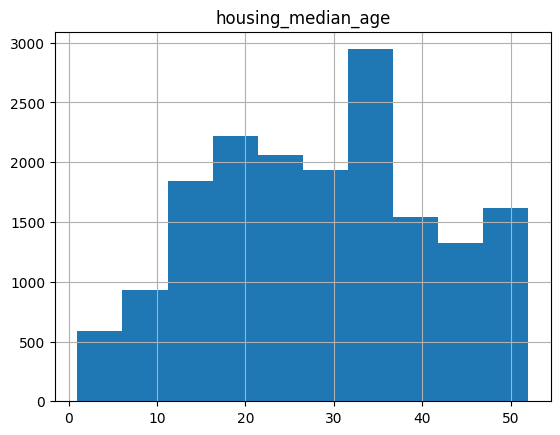

In [7]:
california_housing_dataframe.hist('housing_median_age')

Acceso a datos de DataFrame

In [8]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


,City name
0,San Francisco
1,San Jose
2,Sacramento


In [9]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [10]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


Manipulación de datos

In [11]:
population / 1000.

,0
0,852.469
1,1015.785
2,485.199


Numpy

In [12]:
import numpy as np

np.log(population)

,0
0,13.655892
1,13.831172
2,13.092314


In [13]:
population.apply(lambda val: val > 1000000)

,0
0,False
1,True
2,False


Modificación de DataFrames

In [14]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


Ejercicio 1. Para modificar la tabla de cities, agrega una nueva columna booleana que sea Verdadera si y solo si ambos de los siguientes valores son Verdaderos:

La ciudad le debe su nombre a un santo.
La ciudad tiene un área superior a 50 millas cuadradas.

In [15]:
cities['Es ancha y tiene nombre de Santo'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

,City name,Population,Area square miles,Population density,Es ancha y tiene nombre de Santo
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


Índices

In [16]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [17]:
cities.index

RangeIndex(start=0, stop=3, step=1)

Manipulación de celdas con reindex

In [18]:
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density,Es ancha y tiene nombre de Santo
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


In [19]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density,Es ancha y tiene nombre de Santo
1,San Jose,1015785,176.53,5754.177760,True
0,San Francisco,852469,46.87,18187.945381,False
2,Sacramento,485199,97.92,4955.055147,False


In [20]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density,Es ancha y tiene nombre de Santo
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False


Ejercicio 2. El método de reindex permite los valores de índice que no están en los valores de índice originales de DataFrame. Pruébalo y observa lo que sucede si usas esos valores. ¿Por qué supones que los permite?

In [22]:
cities.reindex([0, 4, 5, 2])
cities.reindex([1, 5, 2, 0])

,City name,Population,Area square miles,Population density,Es ancha y tiene nombre de Santo
1,San Jose,1015785.0,176.53,5754.177760,True
5,NaN,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,4955.055147,False
0,San Francisco,852469.0,46.87,18187.945381,False


Dando respuesta a la pregunta del ejercicio, puede haber manipulación de elementos en el DataFrame, que son de tipo strings y además se pueden extraer. Por otra parte se pueden identificar columnas con datos inexistentes.